# importing libraries

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Testing Data

In [303]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [304]:
df_test.shape

(418, 11)

In [305]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Training Data

In [306]:
df_train2 = pd.read_csv('train.csv')
df_train=df_train2
df_train.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
df_train.shape

(891, 12)

In [308]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis of train data

### Feature Engineering

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64


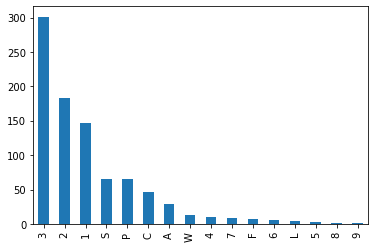

In [309]:
Ticket=df_train['Ticket'].astype(str).str[0]
print(Ticket.value_counts())
Ticket.value_counts().plot(kind='bar')

In [22]:
df_train['Ticket']= Ticket
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,2,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,1,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,1,30.0000,C148,C


### Visualisation

In [23]:
def survived_others(train,fname):
    x1=train[train['Survived']==1][fname].value_counts()
    y1=train[train['Survived']==0][fname].value_counts()
    print(f"Survived  {x1}  \ndead  {y1}")
    dic = {'Survived':x1,'Dead':y1}
    df_new = pd.DataFrame(data=dic)
    df_new.plot(kind='bar',stacked=True)

Survived  female    233
male      109
Name: Sex, dtype: int64  
dead  male      468
female     81
Name: Sex, dtype: int64


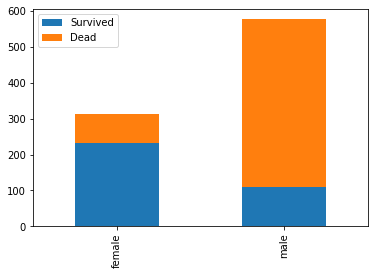

In [24]:
survived_others(df_train,'Sex')

Survived  1    136
3    119
2     87
Name: Pclass, dtype: int64  
dead  3    372
2     97
1     80
Name: Pclass, dtype: int64


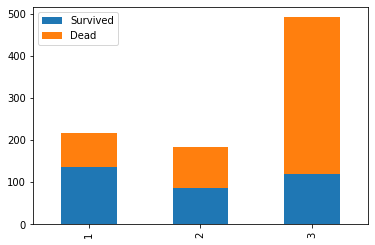

In [25]:
survived_others(df_train,'Pclass')

Survived  1    92
2    85
3    72
P    42
S    21
C    16
F     4
A     2
4     2
W     2
L     1
9     1
6     1
7     1
Name: Ticket, dtype: int64  
dead  3    229
2     98
1     54
S     44
C     31
A     27
P     23
W     11
4      8
7      8
6      5
F      3
L      3
5      3
8      2
Name: Ticket, dtype: int64


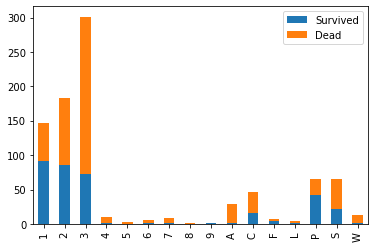

In [26]:
survived_others(df_train,'Ticket')

Survived  S    217
C     93
Q     30
Name: Embarked, dtype: int64  
dead  S    427
C     75
Q     47
Name: Embarked, dtype: int64


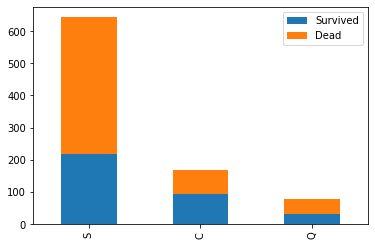

In [27]:
survived_others(df_train,'Embarked')

Survived  0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64  
dead  0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


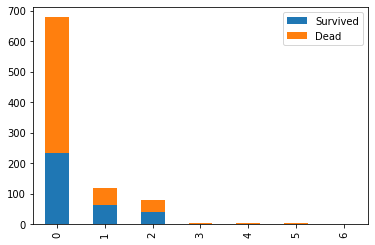

In [28]:
survived_others(df_train,'Parch')

Survived  0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64  
dead  0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


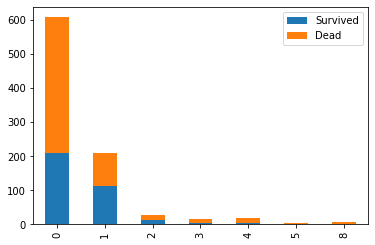

In [29]:
survived_others(df_train,'SibSp')

### Imputing missing data 

In [30]:
df_train['Age'].isnull().sum()

177

In [31]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [32]:
df_train['Age'].isnull().sum()

0

In [33]:
df_train['Age'].shape

(891,)

In [34]:
df_train.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

#### Categorising Age

In [35]:
new_age=[]
age=df_train['Age']
for i in age:
    if i<=18:
        new_age.append('C') #C=Child
    elif (i>=18 and i<=60):
        new_age.append('A') # A=Adult
    elif (i>60):
        new_age.append('S') #S=senior_citizen

In [36]:
df_train['Age'] = new_age

In [37]:
df_train['Age'].value_counts()

A    730
C    139
S     22
Name: Age, dtype: int64

Survived  A    267
C     70
S      5
Name: Age, dtype: int64  
dead  A    463
C     69
S     17
Name: Age, dtype: int64


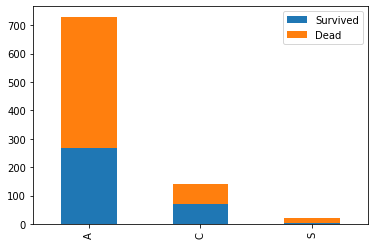

In [38]:
survived_others(df_train,'Age')

In [39]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,A,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,A,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,A,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,A,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,A,0,0,3,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,A,0,0,2,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,A,0,0,1,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,A,1,2,W,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,A,0,0,1,30.0000,C148,C


# Concatenating test and train data

In [310]:
df = pd.concat([df_train2,df_test],axis=0)

In [311]:
df.shape

(1309, 12)

In [312]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [313]:
df_test['Age'].isnull().sum()

86

In [314]:
df_train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Re-indexing

In [315]:
df.reset_index(drop=True,inplace=True)

In [316]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [317]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Feature Engineering

#### Dropping columns

In [318]:
df = df.drop(columns=['PassengerId','Fare','Cabin','Name'],axis=1)

In [319]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0.0,3,male,22.0,1,0,A/5 21171,S
1,1.0,1,female,38.0,1,0,PC 17599,C
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,S
3,1.0,1,female,35.0,1,0,113803,S
4,0.0,3,male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,A.5. 3236,S
1305,NaN,1,female,39.0,0,0,PC 17758,C
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,S
1307,NaN,3,male,NaN,0,0,359309,S


#### Imputing missing value

In [320]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Embarked      2
dtype: int64

In [321]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [322]:
df['Embarked'].fillna('S',inplace=True)

In [323]:
value=df['Age'].mean()
df['Age'].fillna(value,inplace=True)

#### Changing Ticket column

In [324]:
Ticket=df['Ticket'].astype(str).str[0]
print(Ticket.value_counts())
len(Ticket)

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64


1309

In [325]:
df['Ticket'] = Ticket

#### Categorising Age

In [326]:
new_age=[]
age=df['Age']
for i in age:
    if i<=18:
        new_age.append('C') #C=Child
    elif (i>=18 and i<=60):
        new_age.append('A') # A=Adult
    elif (i>60):
        new_age.append('S') #S=senior_citizen

In [327]:
df['Age'] =new_age

In [328]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0.0,3,male,A,1,0,A,S
1,1.0,1,female,A,1,0,P,C
2,1.0,3,female,A,0,0,S,S
3,1.0,1,female,A,1,0,1,S
4,0.0,3,male,A,0,0,3,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,A,0,0,A,S
1305,NaN,1,female,A,0,0,P,C
1306,NaN,3,male,A,0,0,S,S
1307,NaN,3,male,A,0,0,3,S


#### Handling categorical Data (Creating dummy variables)

In [357]:
df=pd.get_dummies(df,columns=['Ticket','Parch','SibSp','Pclass','Age','Sex','Embarked'])

KeyError: "None of [Index(['Ticket', 'Parch', 'SibSp', 'Pclass', 'Age', 'Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [330]:
df.columns

Index(['Survived', 'Ticket_2', 'Ticket_3', 'Ticket_4', 'Ticket_5', 'Ticket_6',
       'Ticket_7', 'Ticket_8', 'Ticket_9', 'Ticket_A', 'Ticket_C', 'Ticket_F',
       'Ticket_L', 'Ticket_P', 'Ticket_S', 'Ticket_W', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Pclass_2',
       'Pclass_3', 'Age_C', 'Age_S', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [331]:
df.drop(columns=['Ticket_6','Ticket_7','Ticket_9','Ticket_L','Ticket_W','Ticket_A','Ticket_4','Ticket_F','Ticket_8','Ticket_5'],inplace=True) #drop Ticket=6,7,9,L,w,4,A,F,8,5,
df.drop(columns=['Parch_3','Parch_5','Parch_4','Parch_6'],inplace=True) #drop Parch = 3,5,4,6
df.drop(columns=['SibSp_5','SibSp_8'],inplace=True) #drop SibSp = 5,8

In [332]:
df

,Survived,Ticket_2,Ticket_3,Ticket_C,Ticket_P,Ticket_S,Parch_1,Parch_2,Parch_9,SibSp_1,SibSp_2,SibSp_3,SibSp_4,Pclass_2,Pclass_3,Age_C,Age_S,Sex_male,Embarked_Q,Embarked_S
0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1305,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1307,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


# Separating the data for Training and Testing(as given)

In [333]:
test=df.iloc[891:] # Which we will be predicting for kaggle competition solution

In [334]:
ittr=df.shape[0]
numb=[]
for i in range(891,ittr):
    numb.append(i)

In [335]:
train=df.drop(numb)

### Splitting train data to check the accuracy of model

In [336]:
X=train.drop(columns='Survived')
Y=train['Survived']

In [337]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=20)

# Testing different classifiers

In [338]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.7425373134328358


In [339]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB(alpha=15)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.753731343283582


In [340]:
from sklearn import svm
model=svm.SVC(C=15, kernel='rbf',gamma=0.1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
score=accuracy_score(Y_test,predictions)
print(score)

0.7649253731343284


In [356]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=8)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.7835820895522388


In [342]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.7611940298507462


In [343]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_split=100,min_samples_leaf=5)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.7761194029850746


So, Logitic Regression has the maximum accuracy

# Now training the whole data and using the testing data provided earlier

In [248]:
X=train.drop(columns='Survived')
Y=train['Survived']

(891,)

In [250]:
X_test=test.drop(columns='Survived')

In [289]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=8)
model.fit(X,Y)
predictions=model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [294]:
predictions=predictions.astype(int)

In [295]:
p_id=df_test['PassengerId']

In [297]:
data={'PassengerId':p_id,'Survived':predictions}
final_predicted=pd.DataFrame(data)

In [298]:
final_predicted.to_csv('submission.csv',index=False)

In [299]:
check=pd.read_csv('submission.csv')

In [300]:
check

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Time wastage

In [ ]:
# def missing_imputation1(df_obt,col_name):
#     data_missing=df[df[col_name].isnull()]
#     return data_missing

# age_missing=missing_imputation1(df,'Age')
# age_missing
# survived_missing=missing_imputation1(df,'Survived')
# survived_missing
# df_survived=df
# df_nan=df[df['Survived'].isnull()].drop(columns='Cabin')
# df_nan.shape
# df_survived=df_survived.drop(columns='Cabin')
# df_survived.dropna(inplace=True)
# df_final=pd.concat([df_survived,df_nan],axis=0)
# df_final.head()
# X_train = df_final.drop(columns=['Age','Survived','Name','Ticket','PassengerId'])
# X_train=X_train.iloc[0:713]
# X_test = df_final.drop(columns=['Age','Survived','Name','Ticket','PassengerId'])
# X_test=X_test.iloc[713:].dropna()
# Y_train = df_final['Survived']
# Y_train = Y_train.iloc[0:713]
# Y_test = df_final['Survived']
# Y_test = Y_test.iloc[713:]
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression(C=2)
# model.fit(X_train,Y_train)
# predictions=model.predict(X_test)
# predictions.shape